Project: Portfolio Diversification

Name: Donald Shi

In [149]:
from IPython.display import display, Math, Latex
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [150]:
new_df = pd.read_csv("industries.csv")
picked_stocks = ['CSU.TO', 'GIB-A.TO', 'CTS.TO', 'KXS.TO', 'BB.TO']
starting = "2019-01-01"
ending = "2021-12-02"
data = yf.download(picked_stocks, start = starting, end = ending, interval = "1mo")["Close"]
data.index = data.index.strftime("%Y-%m-%d")
data = data.dropna()
data.head()

[*********************100%***********************]  5 of 5 completed


Ticker,BB.TO,CSU.TO,CTS.TO,GIB-A.TO,KXS.TO
Date,,,,,
2019-01-01,10.58,980.619995,0.60,86.870003,78.129997
2019-02-01,11.44,1123.729980,0.56,88.230003,82.730003
2019-03-01,13.47,1132.500000,0.85,91.870003,77.970001
2019-04-01,12.29,1182.069946,1.12,96.430000,73.209999
2019-05-01,10.61,1170.359985,0.90,98.519997,78.309998


In [151]:
investment = 10000
invest_per_stock = investment / len(picked_stocks)
portfolio = data / data.iloc[0] * invest_per_stock
portfolio["Total Value"] = portfolio.sum(axis = 1)
portfolio.head()


Ticker,BB.TO,CSU.TO,CTS.TO,GIB-A.TO,KXS.TO,Total Value
Date,,,,,,
2019-01-01,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,10000.000000
2019-02-01,2162.570825,2291.876539,1866.666600,2031.311168,2117.752624,10470.177757
2019-03-01,2546.313868,2309.763223,2833.333300,2115.114535,1995.904364,11800.429290
2019-04-01,2323.251427,2410.862418,3733.333201,2220.098935,1874.056103,12561.602084
2019-05-01,2005.671027,2386.979648,2999.999801,2268.216727,2004.607713,11665.474916


Text(0.5, 1.0, 'Total Portfolio Value')

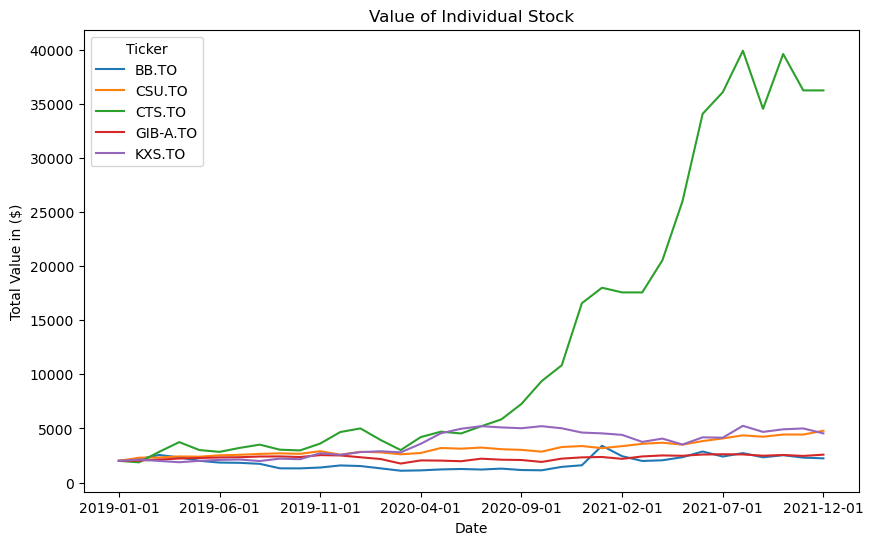

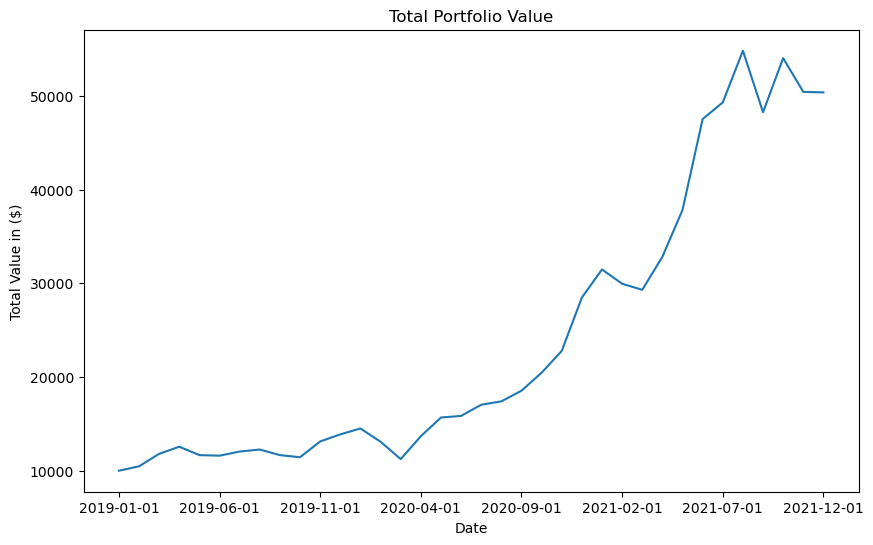

In [152]:
plt.figure(figsize = (10,6))
portfolio.iloc[:, :-1].plot(ax=plt.gca())
plt.ylabel("Total Value in ($)")
plt.title("Value of Individual Stock")


plt.figure(figsize = (10,6))
portfolio.iloc[:,-1].plot(ax=plt.gca())
plt.ylabel("Total Value in ($)")
plt.title("Total Portfolio Value")

In [153]:
returns = portfolio.pct_change()
returns *=100
returns = returns.drop(returns.index[0])
returns.head()

Ticker,BB.TO,CSU.TO,CTS.TO,GIB-A.TO,KXS.TO,Total Value
Date,,,,,,
2019-02-01,8.128541,14.593827,-6.666670,1.565558,5.887631,4.701778
2019-03-01,17.744762,0.780438,51.785718,4.125580,-5.753659,12.705148
2019-04-01,-8.760210,4.377037,31.764703,4.963533,-6.104915,6.450382
2019-05-01,-13.669653,-0.990632,-19.642860,2.167371,6.966259,-7.133860
2019-06-01,-8.011305,5.459005,-5.555550,2.192452,4.290641,-0.525495


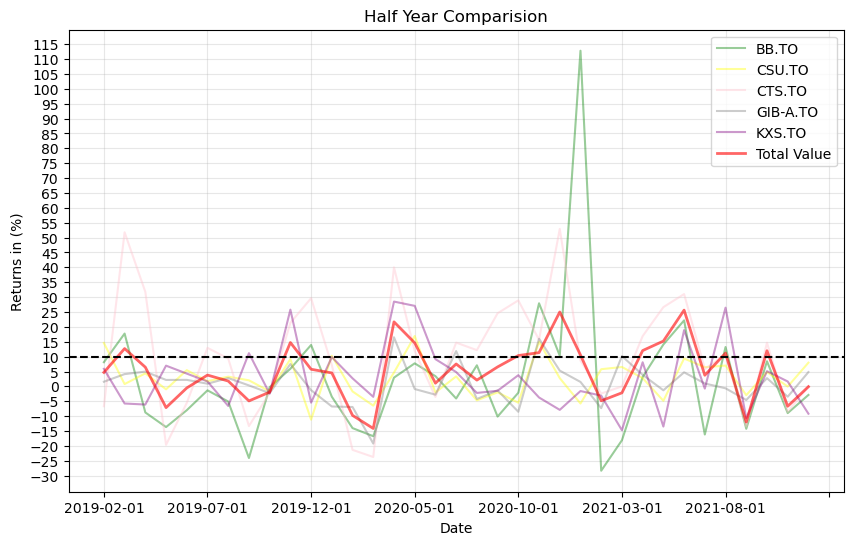

In [154]:
plt.figure(figsize = (10,6))
colour = ["green", "yellow", "pink", "grey", "purple"]
index = 0 
for col in returns.columns:
    if col != "Total Value":
        returns[col].plot(ax = plt.gca(), color = colour[index], alpha = 0.4, label = col)
        index +=1
    else:
        returns[col].plot(ax = plt.gca(), color = 'red', alpha = 0.6, label = col, linewidth=2)

plt.grid(alpha = 0.3)
plt.ylabel("Returns in (%)")
plt.title("Half Year Comparision")
plt.axhline(y = 10, color= 'black', linestyle= '--')
plt.yticks(range(-30, 120, 5))
plt.legend()

In [155]:
print('Returns')
print(returns.mean())
print("\n")

print("Volatility")
print(returns.std())

print("\n")

# Compare each individual stock and the portfolio with the Technology Sector ETF Funds.
tech = "XLK"
tech_data = yf.download(tech, start = starting, end = ending, interval = "1mo")['Adj Close']
tech_data_returns = tech_data.pct_change()
tech_data_returns *= 100
tech_data_returns = tech_data_returns.drop(tech_data_returns.index[0])
# Beta: Cov(Stock, Market)/Var(Market)

# Converting the index to the same type for Covariance Calculations
returns.index = pd.to_datetime(returns.index)
tech_data_returns.index = pd.to_datetime(tech_data_returns.index)

print("Beta: ")
for col in returns.columns:
    if col == "Total Value":
        print("This is the formed Portfolio: ")
    covariance = returns[col].cov(tech_data_returns)
    beta = np.round(covariance / tech_data_returns.var(), 4)
    print("Stock : {}\nBeta: {}".format(col, beta))

[*********************100%***********************]  1 of 1 completed

Returns
Ticker
BB.TO           2.242746
CSU.TO          2.720265
CTS.TO         10.252164
GIB-A.TO        0.957097
KXS.TO          2.946714
Total Value     5.169756
dtype: float64


Volatility
Ticker
BB.TO          23.232901
CSU.TO          6.441887
CTS.TO         19.228485
GIB-A.TO        6.900518
KXS.TO         11.334195
Total Value     9.769559
dtype: float64


Beta: 
Stock : BB.TO
Beta: 0.8214
Stock : CSU.TO
Beta: 0.5567
Stock : CTS.TO
Beta: 1.4611
Stock : GIB-A.TO
Beta: 0.7082
Stock : KXS.TO
Beta: 0.6635
This is the formed Portfolio: 
Stock : Total Value
Beta: 0.9305


Observations:
1. Diversification helps reducing the overall risk. 
    The portfolio has a beta of 0.93, which indicates that the portfolio reduces less risk 
    compared to the technology sector ETF but with similiar market exposure
    This portfolio who wants market partipation but also risk adverse. 
2. Volatility measures both idiosyncratic risk and systematic risk
    diversification only helps to balance out the idiosyncratic risk, from the volatilities 
    calcualted, the portfolio (total value) has a relative lower volatility compared to others
3. High Beta stock like BB.TO and CTS.TO should be closely monitored due to high volatility as they have
a bigger impact on the portfolio value when market fluctuations are volatile.

In [156]:
%%latex
\newpage

<IPython.core.display.Latex object>

In [157]:
def function_get_data(stock_list):
    new_data = yf.download(stock_list, start = starting, end = ending, interval = "1mo")["Close"]
    new_data.index = new_data.index.strftime("%Y-%m-%d")
    new_data = new_data.dropna()
    return new_data 

In [158]:
# Stocks picked from each sector:

#Industrials
industrials_sector  = ['AC.TO', 'TIH.TO', 'TFII.TO', 'CAE.TO', 'WCN.TO']
industrails_data = function_get_data(industrials_sector)

#Healthcare
healthcare_sector  = ['EXE.TO', 'OGI.TO', 'GUD.TO', 'WEED.TO', 'WELL.TO']
healthcare_data = function_get_data(healthcare_sector)

#Energy
energy_sector  = ['PPL.TO', 'POU.TO', 'CNQ.TO', 'MEG.TO', 'IMO.TO']
energy_data = function_get_data(energy_sector)

#Financial Services
finance_sector  = ['CM.TO', 'MFC.TO', 'SLF.TO', 'BNS.TO', 'FFH.TO']
finance_data = function_get_data(finance_sector)

[                       0%                       ]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [159]:
# Adding Sectors into Portfolios
data_list = [data, industrails_data, healthcare_data, energy_data, finance_data]
industries_tickers = [industrials_sector, healthcare_sector, energy_sector, finance_sector]
names = ["Technology", "Industrials", "Healthcare", "Energy", "Financial Services"]

def add_sector_to_portfolio(initial_investment, portfolio, industries, industry_names, monthly_data_list):
    """
    Adds a new sector to our existing portfolio by keeping the initial_investment amount constant,
    the function keeps adding data from the monthy_data_llist.
    
    add_sector_to_portfolio: Int Dataframe listof Str listof Str listof Dataframe -> Dataframe 
    
    """
    updated_port = portfolio[["Total Value"]].rename(columns={"Total Value": "Technology"})
    tickers_combined = []
    combined_monthly_data = pd.DataFrame()
    for i in range(len(industries)):
        ticker = industries[i]
        monthly_data = monthly_data_list[i]
        # adding into the list 
        tickers_combined.extend(ticker)
        combined_monthly_data = pd.concat([combined_monthly_data, monthly_data], axis=1)
        # Calculating the amount to invest
        investment_per_stock = initial_investment / len(tickers_combined)
        price_ratio = combined_monthly_data / combined_monthly_data.iloc[0]
        new_port = price_ratio * investment_per_stock
        col_name = ' & '.join(industry_names[:i + 1])
        updated_port[col_name] = new_port.sum(axis=1)
    return updated_port

integradeted_portfolio = add_sector_to_portfolio(10000, portfolio, industries_tickers, names, data_list)

integradeted_portfolio.head()

Ticker,Technology,Technology & Industrials,Technology & Industrials & Healthcare,Technology & Industrials & Healthcare & Energy
Date,,,,
2019-01-01,10000.000000,10000.000000,10000.000000,10000.000000
2019-02-01,10470.177757,10566.980739,10560.806493,10519.289699
2019-03-01,11800.429290,11315.167408,11258.381224,10906.396609
2019-04-01,12561.602084,11945.464221,11901.960471,11654.459435
2019-05-01,11665.474916,11660.912912,11727.420625,11188.983305


Text(0.5, 1.0, 'Portfolio with different Industry')

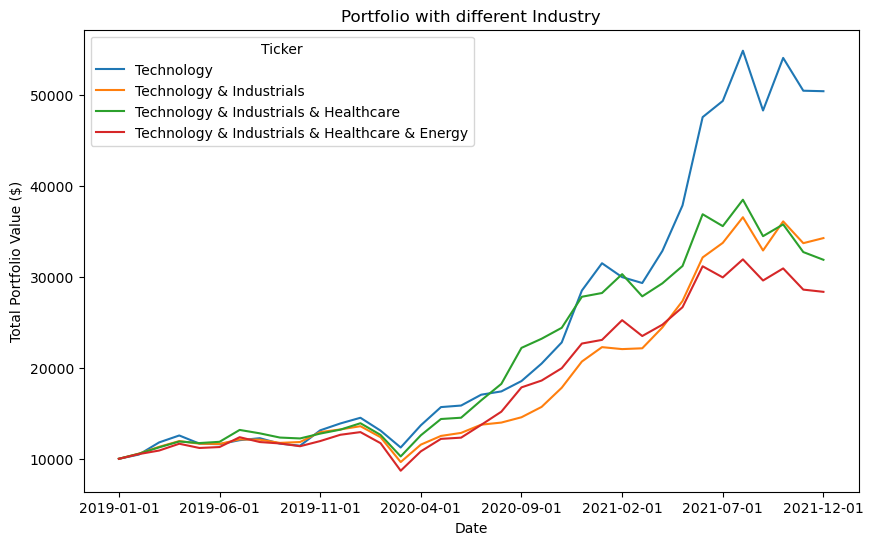

In [160]:
plt.figure(figsize = (10,6))
integradeted_portfolio.plot(ax = plt.gca())
plt.ylabel("Total Portfolio Value ($)")
plt.title("Portfolio with different Industry")

In [161]:
new_returns = integradeted_portfolio.pct_change()
new_returns *=100
new_returns = new_returns.drop(index = new_returns.index[0])
new_returns.head()


Ticker,Technology,Technology & Industrials,Technology & Industrials & Healthcare,Technology & Industrials & Healthcare & Energy
Date,,,,
2019-02-01,4.701778,5.669807,5.608065,5.192897
2019-03-01,12.705148,7.080420,6.605317,3.679972
2019-04-01,6.450382,5.570371,5.716446,6.858937
2019-05-01,-7.133860,-2.382087,-1.466480,-3.993974
2019-06-01,-0.525495,-0.270308,1.176162,0.903273


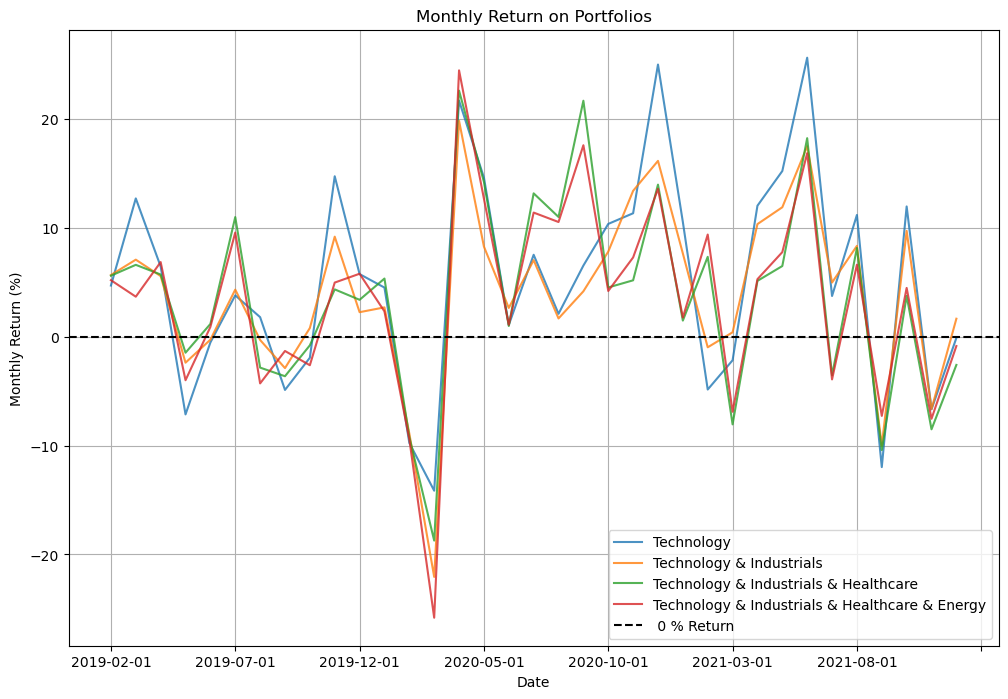

In [162]:
plt.figure(figsize=(12,8))
for col in new_returns.columns:
    new_returns[col].plot(ax = plt.gca(), label = col, alpha = 0.8)

plt.axhline(y=0, color='black', linestyle='--', label = " 0 % Return")
plt.ylabel("Monthly Return (%)")
plt.title("Monthly Return on Portfolios")
plt.grid()
plt.legend()

In [163]:
print("Mean: ")
print(new_returns.mean())
print()

print("Volatility: ")
print(new_returns.std())

Mean: 
Ticker
Technology                                        5.169756
Technology & Industrials                          3.906993
Technology & Industrials & Healthcare             3.754123
Technology & Industrials & Healthcare & Energy    3.440767
dtype: float64

Volatility: 
Ticker
Technology                                        9.769559
Technology & Industrials                          8.162624
Technology & Industrials & Healthcare             9.040895
Technology & Industrials & Healthcare & Energy    9.226686
dtype: float64


Note:
1. The portfolio made of sectors in Technology & Industrials has a average return of 3.9 % and a relatively low volatility of 8.16%
2. Risk Tolerant investors should choose Technology Portfolio with an average return of (5.17%)

3. Adding Industrials reduces volatility and adding Healthcare & Energy increases volatility. 
    - Industrail sector includes companies with steady cash flows and demand (infrastructure, manufacture, production)
    - Industrails have lower sensitivity to changes in economic conditions 

    - Healthcare could be influenced by research & development, changes in policies (i.e covering a drug in insurance)
    - Energy is highly volatile and depends on oil & gas.
            - could be influenced by political, geological issues -> i.e War 
            - Production costs

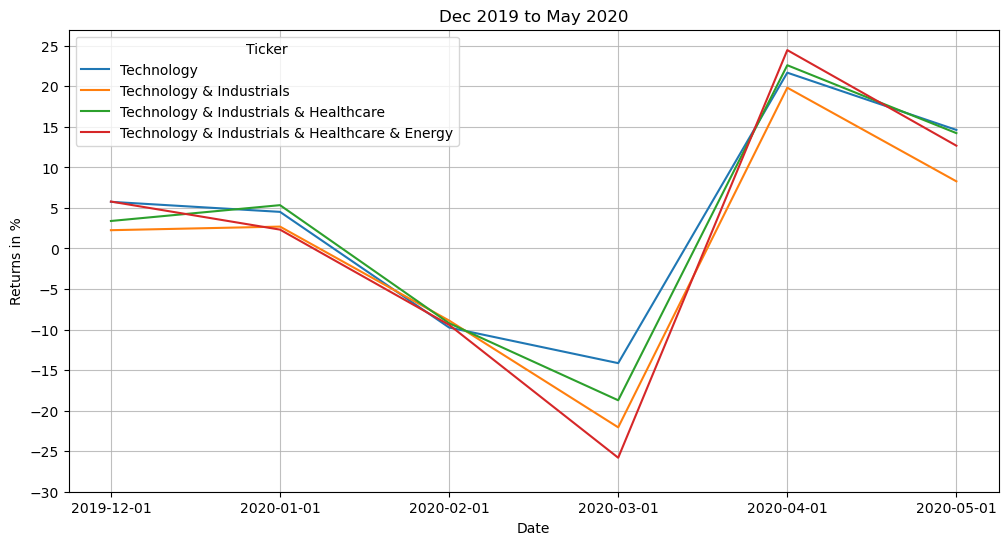

In [164]:
period_2019 = new_returns.loc["2019-12-01": "2020-05-01"]
plt.figure(figsize = (12,6))
period_2019.plot(ax=plt.gca())
plt.title("Dec 2019 to May 2020")
plt.ylabel("Returns in %")
plt.yticks(range(-30,30,5))
plt.grid(alpha = 0.8)

In [165]:
%%latex
\newpage

<IPython.core.display.Latex object>

In [166]:
bitcoin = "BTC-CAD"
etherium = "ETH-CAD"
bitcoin_data = yf.download(bitcoin, start = starting, end = ending, interval = "1mo")["Adj Close"]
etherium_data = yf.download(etherium, start = starting, end = ending, interval = "1mo")["Adj Close"]
combined_crypto = pd.concat([bitcoin_data,etherium_data], axis = 1)
combined_crypto.columns = ["Bitcoin", "Etherium"]
combined_crypto.index = combined_crypto.index.strftime("%Y-%m-%d")
combined_crypto.head()


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


,Bitcoin,Etherium
Date,,
2019-01-01,4540.254883,140.576462
2019-02-01,5074.797852,180.025482
2019-03-01,5480.324707,188.907867
2019-04-01,7165.559570,217.168701
2019-05-01,11601.275391,362.756836


In [167]:
invest_per_cryp = investment / len(combined_crypto.columns)
price_ratio = combined_crypto / combined_crypto.iloc[0]
crypto_port = price_ratio * invest_per_cryp
crypto_port["Total Value"] = crypto_port.sum(axis = 1)
crypto_port.head()

,Bitcoin,Etherium,Total Value
Date,,,
2019-01-01,5000.000000,5000.000000,10000.000000
2019-02-01,5588.670661,6403.116136,11991.786798
2019-03-01,6035.261068,6719.043324,12754.304393
2019-04-01,7891.142409,7724.219916,15615.362324
2019-05-01,12776.017746,12902.474259,25678.492005


In [168]:
crypto_returns = crypto_port.pct_change()
crypto_returns = crypto_returns.drop(index = crypto_returns.index[0])
crypto_returns *=100
crypto_returns.index = pd.to_datetime(crypto_returns.index)
crypto_returns.index = crypto_returns.index.strftime("%Y-%m-%d")
crypto_returns.head()

,Bitcoin,Etherium,Total Value
Date,,,
2019-02-01,11.773413,28.062323,19.917868
2019-03-01,7.990995,4.933960,6.358665
2019-04-01,30.750639,14.960115,22.432097
2019-05-01,61.903272,67.039188,64.443780
2019-06-01,22.062937,4.905906,13.442175


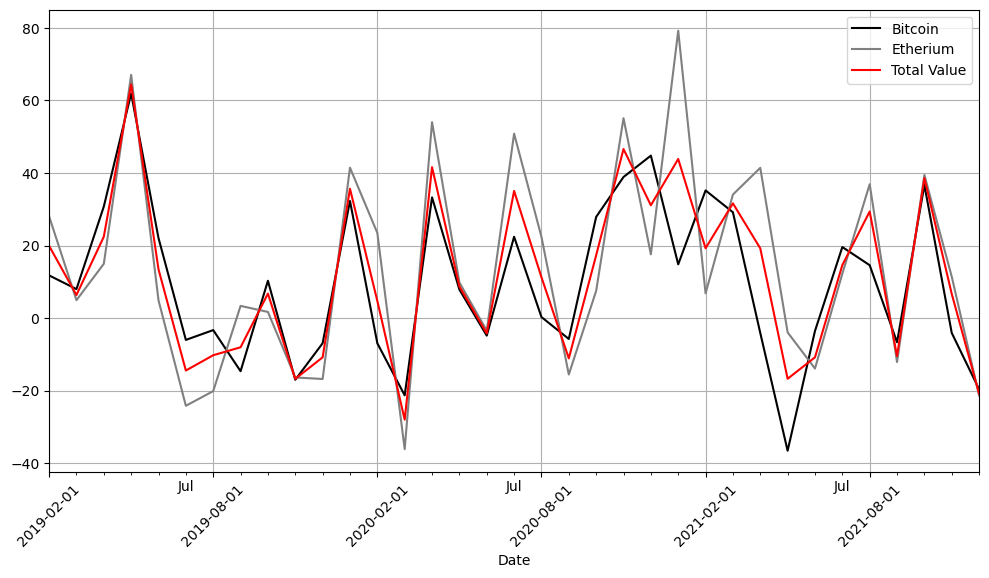

In [169]:
plt.figure(figsize= (12,6))
crypto_returns.index = pd.to_datetime(crypto_returns.index)
for column in crypto_returns.columns:
    if column == "Bitcoin":
        crypto_returns[column].plot(ax = plt.gca(), label = column, color = "black")
    elif column == "Etherium":
        crypto_returns[column].plot(ax = plt.gca(), label = column, color = "grey")
    else:
        crypto_returns[column].plot(ax = plt.gca(), label = column, color = "red")

plt.xticks(ticks=crypto_returns.index[::6],
           labels=crypto_returns.index[::6].strftime("%Y-%m-%d"), rotation=45)
plt.legend()
plt.grid()

In [170]:
%%latex
\newpage

<IPython.core.display.Latex object>

In [171]:
# Combining the stocks with the crypto currencies
stock_data = pd.concat([data, industrails_data, healthcare_data, energy_data, finance_data], axis = 1)
crypto_data = combined_crypto
stock_crypto = pd.concat([stock_data, crypto_data], axis = 1)
stock_crypto.head()

,BB.TO,CSU.TO,CTS.TO,GIB-A.TO,KXS.TO,AC.TO,CAE.TO,TFII.TO,TIH.TO,WCN.TO,...,MEG.TO,POU.TO,PPL.TO,BNS.TO,CM.TO,FFH.TO,MFC.TO,SLF.TO,Bitcoin,Etherium
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,10.58,980.619995,0.60,86.870003,78.129997,29.670000,27.920000,38.680000,58.389999,109.650002,...,5.43,7.75,46.820000,57.456947,55.705002,621.549988,21.110001,47.400002,4540.254883,140.576462
2019-02-01,11.44,1123.729980,0.56,88.230003,82.730003,33.110001,27.750000,40.549999,68.500000,109.709999,...,5.40,8.98,48.160000,56.181831,55.814999,651.530029,22.240000,49.820000,5074.797852,180.025482
2019-03-01,13.47,1132.500000,0.85,91.870003,77.970001,32.209999,29.610001,39.470001,68.250000,118.370003,...,5.10,7.12,49.090000,54.645550,52.799999,619.000000,22.600000,51.340000,5480.324707,188.907867
2019-04-01,12.29,1182.069946,1.12,96.430000,73.209999,32.160000,31.160000,44.000000,69.669998,124.339996,...,5.96,8.92,47.900002,57.375107,56.404999,638.880005,24.670000,55.660000,7165.559570,217.168701
2019-05-01,10.61,1170.359985,0.90,98.519997,78.309998,39.900002,34.470001,41.200001,59.410000,127.870003,...,4.36,7.36,48.220001,53.315765,51.244999,620.000000,22.680000,52.459999,11601.275391,362.756836


In [172]:
ratio = stock_crypto / stock_crypto.iloc[0]
total_portfolio_value = 10000
number_of_stock = 25
number_of_crypto = 2
stock_weight = total_portfolio_value / number_of_stock / 2
crypto_weight = total_portfolio_value / number_of_crypto / 2

stock_crypto_port = ratio.copy()
for i, col in enumerate(stock_crypto_port.columns):
    if i < len(stock_crypto_port.columns) - 2:
        stock_crypto_port[col] = ratio[col] * stock_weight
    else:
        stock_crypto_port[col]= ratio[col] * crypto_weight
        
stock_crypto_port["Total Mixed Portfolio Value"] = stock_crypto_port.sum(axis = 1)
stock_crypto_port.head()


,BB.TO,CSU.TO,CTS.TO,GIB-A.TO,KXS.TO,AC.TO,CAE.TO,TFII.TO,TIH.TO,WCN.TO,...,POU.TO,PPL.TO,BNS.TO,CM.TO,FFH.TO,MFC.TO,SLF.TO,Bitcoin,Etherium,Total Mixed Portfolio Value
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2500.000000,2500.000000,10000.000000
2019-02-01,216.257082,229.187654,186.66666,203.131117,211.775262,223.188409,198.782234,209.669074,234.629220,200.109435,...,231.741924,205.724050,195.561491,200.394926,209.646864,210.705818,210.210962,2794.335331,3201.558068,11230.129340
2019-03-01,254.631387,230.976322,283.33333,211.511454,199.590436,217.121665,212.106021,204.084803,233.772909,215.905155,...,183.741933,209.696713,190.213899,189.570048,199.179475,214.116530,216.624466,3017.630534,3359.521662,11749.415257
2019-04-01,232.325143,241.086242,373.33332,222.009894,187.405610,216.784629,223.209167,227.507754,238.636749,226.794336,...,230.193550,204.613421,199.715124,202.513228,205.576387,233.728085,234.852312,3945.571204,3862.109958,13545.850073
2019-05-01,200.567103,238.697965,299.99998,226.821673,200.460771,268.958554,246.919779,213.029992,203.493751,233.233016,...,189.935487,205.980357,185.585096,183.987065,199.501251,214.874464,221.350200,6388.008873,6451.237129,18320.137400


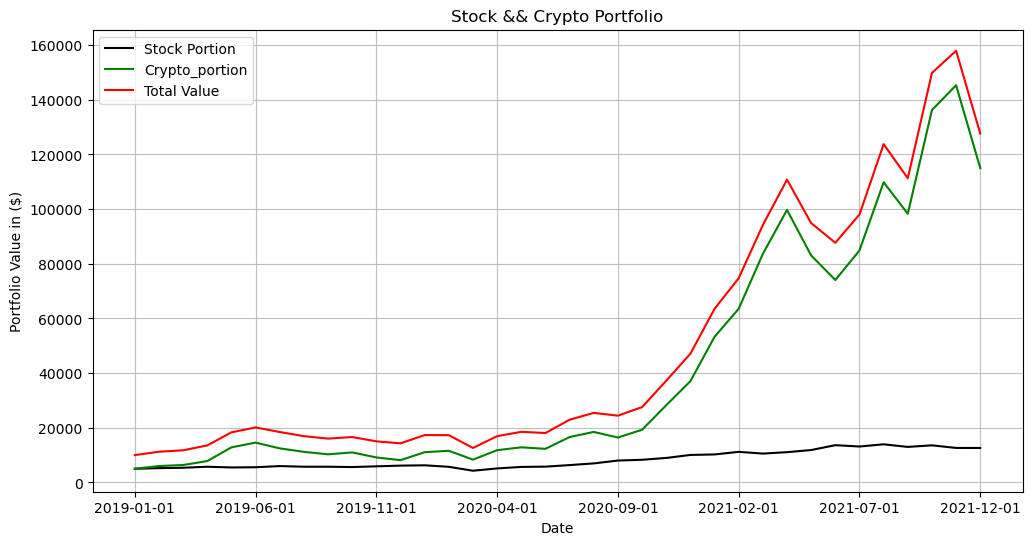

In [173]:
stock_portfolio = stock_crypto_port.iloc[: , :-3]
stock_portfolio["Total Value"] = stock_portfolio.sum(axis = 1)

crypto_portfolio = stock_crypto_port.iloc[: , -3:-1]
crypto_portfolio["Total Value"] = crypto_portfolio.sum(axis = 1)

mixed_port = pd.concat([stock_portfolio["Total Value"], crypto_portfolio["Total Value"]], axis = 1)
mixed_port.columns = ["Stock Portion", "Crypto_portion"]

mixed_port["Total Value"] = mixed_port.sum(axis = 1)

plt.figure(figsize = (12,6))
for col in mixed_port:
    if col == "Stock Portion":
        mixed_port[col].plot(ax = plt.gca(), label = col, color = "black")
    elif col == "Crypto_portion":
        mixed_port[col].plot(ax = plt.gca(), label = col, color = "green")
    else:
        mixed_port[col].plot(ax = plt.gca(), label = col, color = "red")
        
plt.legend()

plt.title("Stock && Crypto Portfolio")
plt.ylabel("Portfolio Value in ($)")
plt.grid(alpha = 0.8)
        

In [174]:
mixed_port_return = mixed_port.pct_change()
mixed_port_return = mixed_port_return.drop(index = mixed_port_return.index[0])
mixed_port_return *=100

print("Average Return in %")
print(mixed_port_return.mean())

print()

print("Volatility")
print(mixed_port_return.std())


Average Return in %
Stock Portion      3.023132
Crypto_portion    11.603977
Total Value        8.887711
dtype: float64

Volatility
Stock Portion      8.303849
Crypto_portion    22.638405
Total Value       17.129152
dtype: float64


In [175]:
%%latex
\newpage

<IPython.core.display.Latex object>

In [176]:
stock_crypto.head()

,BB.TO,CSU.TO,CTS.TO,GIB-A.TO,KXS.TO,AC.TO,CAE.TO,TFII.TO,TIH.TO,WCN.TO,...,MEG.TO,POU.TO,PPL.TO,BNS.TO,CM.TO,FFH.TO,MFC.TO,SLF.TO,Bitcoin,Etherium
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,10.58,980.619995,0.60,86.870003,78.129997,29.670000,27.920000,38.680000,58.389999,109.650002,...,5.43,7.75,46.820000,57.456947,55.705002,621.549988,21.110001,47.400002,4540.254883,140.576462
2019-02-01,11.44,1123.729980,0.56,88.230003,82.730003,33.110001,27.750000,40.549999,68.500000,109.709999,...,5.40,8.98,48.160000,56.181831,55.814999,651.530029,22.240000,49.820000,5074.797852,180.025482
2019-03-01,13.47,1132.500000,0.85,91.870003,77.970001,32.209999,29.610001,39.470001,68.250000,118.370003,...,5.10,7.12,49.090000,54.645550,52.799999,619.000000,22.600000,51.340000,5480.324707,188.907867
2019-04-01,12.29,1182.069946,1.12,96.430000,73.209999,32.160000,31.160000,44.000000,69.669998,124.339996,...,5.96,8.92,47.900002,57.375107,56.404999,638.880005,24.670000,55.660000,7165.559570,217.168701
2019-05-01,10.61,1170.359985,0.90,98.519997,78.309998,39.900002,34.470001,41.200001,59.410000,127.870003,...,4.36,7.36,48.220001,53.315765,51.244999,620.000000,22.680000,52.459999,11601.275391,362.756836


In [179]:
# Returns: in % 
returns = stock_crypto.pct_change().dropna()
returns *= 100

# Dummy Variables:
curr_max = 0 
optimal_weights = (0,0)
ratios = []
risk_free_rate = 0 # Rf can be adjusted 
investment_amount = 10000

stock_returns = returns.iloc[:, :-2].mean(axis = 1)
crypto_returns = returns.iloc[:, -2:].mean(axis = 1)

# To find the weight
for i in range(0,101):
    # initial weights 
    stock_weights = i / 100
    crypto_weights = 1 - stock_weights
    # return 
    total_portfolio_return  = (stock_returns * stock_weights) +  (crypto_returns * crypto_weights)
    combined_returns = pd.concat([stock_returns, crypto_returns], axis=1).rename(columns={0: "Stock Returns", 1: "Crypto Returns"})
    weights = np.array([stock_weights, crypto_weights])
    # calculating the standard deviation
    covariance_matrix = combined_returns.cov().values
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    
    # Sharpe ratio
    sharpe_ratio = (total_portfolio_return.mean() - risk_free_rate) / portfolio_std
    ratios.append(sharpe_ratio)
    if sharpe_ratio > curr_max:
        curr_max = sharpe_ratio 
        optimal_weights = (stock_weights, crypto_weights)

print("Optimal Weights: Stock = {} %,Crypto = {} %".format(np.round(optimal_weights[0]*100), np.round(optimal_weights[1]*100)))
print("Maximum Sharpe Ratio: {}".format(np.round(curr_max, 3)))
    


Optimal Weights: Stock = 27.0 %,Crypto = 73.0 %
Maximum Sharpe Ratio: 0.516


[*********************100%***********************]  5 of 5 completed


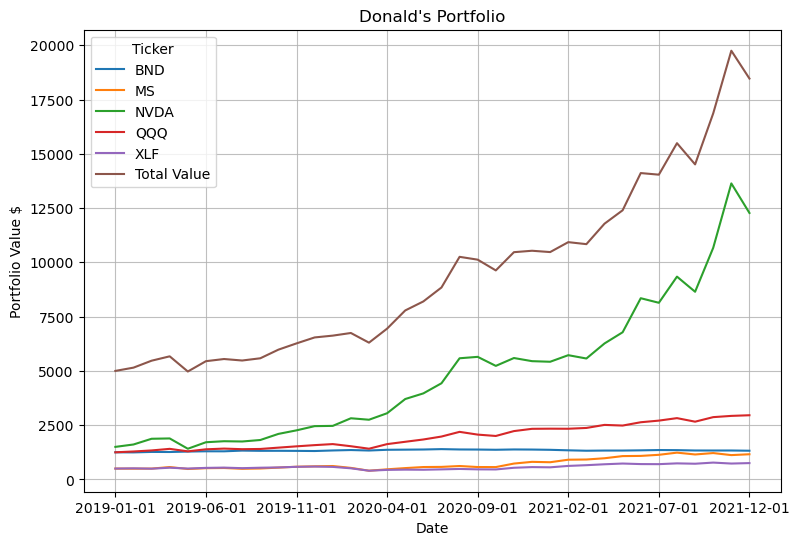

In [180]:
# Play around the model -> Personal Preference: 
# Stocks Selected:
personal_stocks = ["NVDA", "BND","MS","XLF","QQQ"]
starting = "2019-01-01"
ending = "2021-12-02"
personal_data = yf.download(personal_stocks, start = starting, end = ending, interval = "1mo")["Close"]
personal_data.index = personal_data.index.strftime("%Y-%m-%d")
personal_data
initial_investment = 5000
# Weighting based on Personal Preference:
weights_per_stock = np.array([25,10,30,25,10]) / 100
invest_per_stock = weights_per_stock * initial_investment
my_portfolio = personal_data / personal_data.iloc[0] * invest_per_stock
my_portfolio["Total Value"] = my_portfolio.sum(axis=1)
plt.figure(figsize=(9,6))
plt.title("Donald's Portfolio")
plt.ylabel("Portfolio Value $")
my_portfolio.plot(ax=plt.gca())
plt.grid(alpha = 0.8)

Text(0, 0.5, 'Percentage in %')

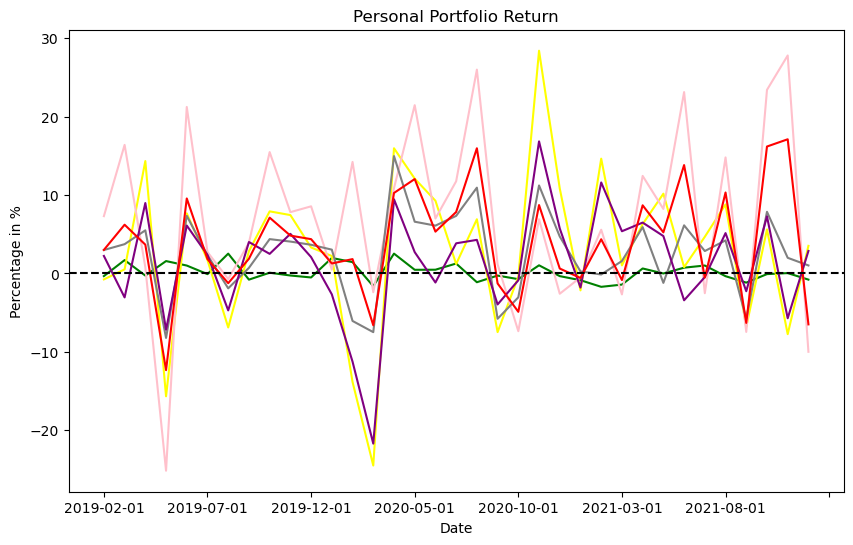

In [181]:
portfolio_return = my_portfolio.pct_change()
portfolio_return = portfolio_return.drop(portfolio_return.index[0])
portfolio_return *=100
plt.figure(figsize=(10,6))
colour = ["green", "yellow", "pink", "grey", "purple"]
i = 0
for col in portfolio_return.columns:
    if col != "Total Value":
        portfolio_return[col].plot(ax=plt.gca(), color = colour[i], label = col)
        i+=1
    else:
        portfolio_return[col].plot(ax=plt.gca(), label = col, color = 'red')

plt.axhline(y=0, color = 'black', linestyle= '--')
plt.title("Personal Portfolio Return")
plt.ylabel("Percentage in %")

In [182]:
print("Mean: ")
print(portfolio_return.mean())
print()

print("Volatility: ")
print(portfolio_return.std())

Mean: 
Ticker
BND            0.167817
MS             2.915135
NVDA           6.806637
QQQ            2.626741
XLF            1.417297
Total Value    4.031421
dtype: float64

Volatility: 
Ticker
BND             1.123319
MS              9.894632
NVDA           11.431295
QQQ             5.332210
XLF             6.927797
Total Value     6.949365
dtype: float64
